# Redshift Data of DESIJ1101-0602

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
data, header = fits.getdata("DESIJ1101-0602_F140W_drz_sci.fits", header=True)

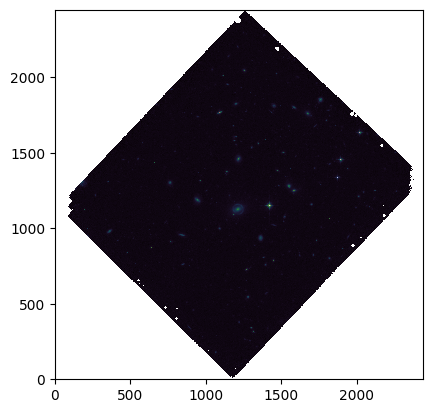

In [3]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [2]:
FILENAME = "photo_z_DESIJ1101-0602.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007901,8000296511001631,165.471605,-6.049366,8000,296511,1631,PSF,0.034,P6,0.595,0.171,1,1
1,0.007798,8000296511001679,165.479843,-6.048355,8000,296511,1679,PSF,0.001,P0,0.458,0.667,1,0
2,0.005182,8000296511001703,165.472069,-6.046506,8000,296511,1703,EXP,0.007,E3,0.302,0.042,1,1
3,0.005677,8000296511001704,165.472916,-6.047507,8000,296511,1704,PSF,0.001,P3,1.200,0.276,1,1
4,0.005540,8000296511001713,165.477874,-6.046968,8000,296511,1713,PSF,0.001,P7,0.842,0.301,1,1


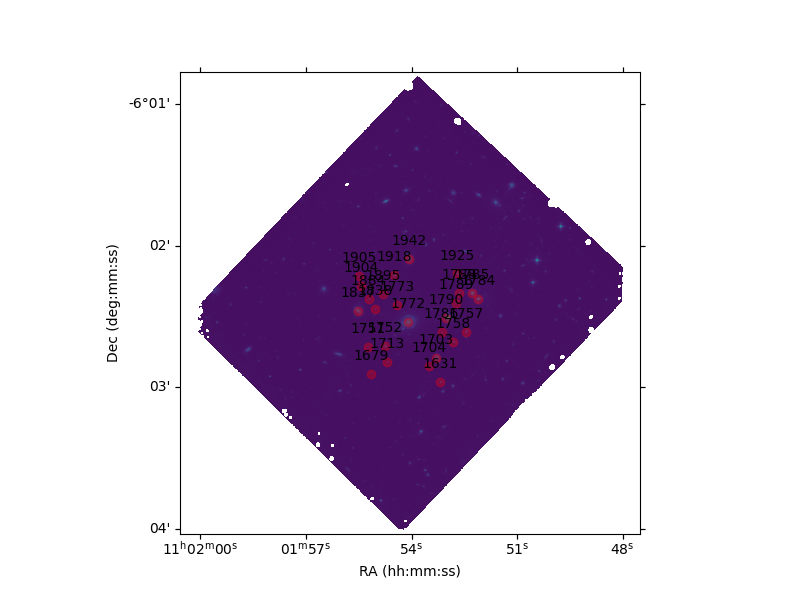

In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

In [7]:
# In degrees
center_x, center_y = 165.4750000, -6.0422222  # RA 11:01:54 DEC -06:02:32
radii = 30  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

854.5666407982851 1600.3998310302786


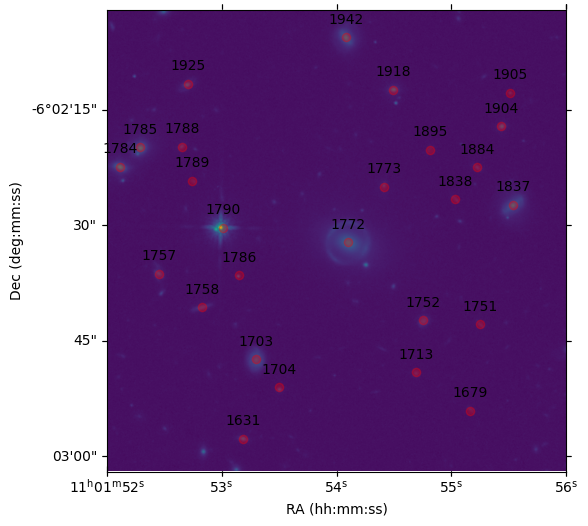

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [3]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 1772
object_ids = [central_deflector_id,
              1773, 1752, 1838, 1895]  

columns_to_drop = [
    "id",
    "RAJ2000",
    "DEJ2000",
    "release",
    "brickid",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
1752   0.004235  REX  0.009      R7  0.952    0.093       1      1
1772   0.000431  DEV  0.061      D7  0.327    0.041       1      1
1773   0.002592  PSF  0.002      P8  0.329    0.630       0      0
1838   0.004520  REX  0.007      R5  1.166    0.571       1      0
1895   0.004687  REX  0.002      R5  0.963    0.361       1      1


## Save the Redshift data to the YAML file

In [4]:
# Existing YAML file with other parameters
existing_yaml_file = "DESIJ1101-0602_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id,'zphot']
e_zphot = selected_data_legacy.loc[central_deflector_id,'e_zphot']

environment_variables = {
    "z_phot": [z_phot, e_zphot]
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)